Alex Bombrun

In [1]:
import numpy as np
import scipy.stats as st 
import sympy as sp
import matplotlib as mp
import matplotlib.pyplot as plt

# change of coordinates

In [2]:
def polar(x,y):
    return np.sqrt(np.power(x,2)+np.power(y,2)),np.arctan2(x,y)

In [6]:
xy = np.array([0.1,0.1])
cov_xy = np.array([[0.1,0.05],[0.05,0.1]])

In [7]:
polar(*xy)

(0.14142135623730953, 0.7853981633974483)

In [8]:
xyp = st.multivariate_normal(mean=xy,cov=cov_xy).rvs(10000)
x,y = xyp[:,0],xyp[:,1]

Text(0,0.5,'y')

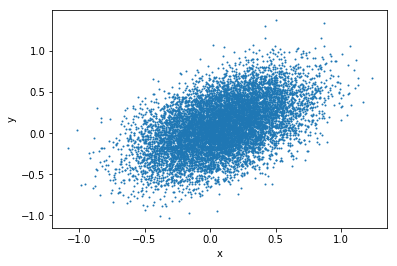

In [9]:
plt.scatter(x,y,s=1)
plt.xlabel('x')
plt.ylabel('y')

In [10]:
r,theta = polar(x,y)

Text(0.5,0,'r')

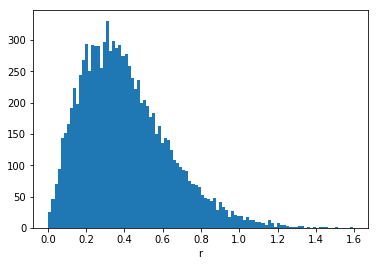

In [11]:
plt.hist(r,bins=100);
plt.xlabel("r")

Text(0.5,0,'theta')

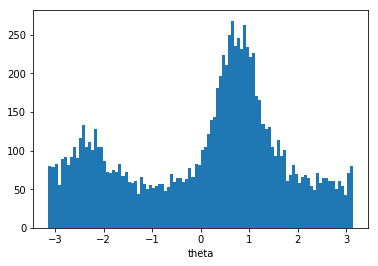

In [12]:
plt.hist(theta,bins=100);
plt.xlabel("theta")

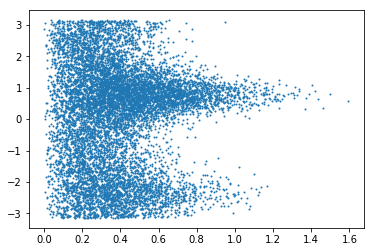

In [13]:
plt.scatter(r,theta,s=1)

# symbolic computation

In [147]:
x,y,cx,cy,cxy = sp.symbols('x,y,cx,cy,cxy')

In [148]:
r,theta = sp.sqrt(x**2+y**2),sp.atan2(x,y)

In [149]:
Cxy = sp.Matrix([[cx,cxy],[cxy,cx]])

In [150]:
Cxy

Matrix([
[ cx, cxy],
[cxy,  cx]])

In [151]:
sp.limit(sin(x)/x,x,0)

1

In [152]:
sp.integrate(x,x)

x**2/2

In [153]:
J = sp.derive_by_array([r,theta],[x,y])

In [154]:
J

[[x/sqrt(x**2 + y**2), y/(x**2 + y**2)], [y/sqrt(x**2 + y**2), -x/(x**2 + y**2)]]

In [155]:
sp.Matrix(2,2,J)

Matrix([
[x/sqrt(x**2 + y**2),  y/(x**2 + y**2)],
[y/sqrt(x**2 + y**2), -x/(x**2 + y**2)]])

In [156]:
sp.Matrix(2,2,J).subs([(x,1),(y,1)]).evalf()

Matrix([
[0.707106781186548,  0.5],
[0.707106781186548, -0.5]])

In [157]:
J = sp.Matrix([r,theta]).jacobian([x,y])
J

Matrix([
[x/sqrt(x**2 + y**2), y/sqrt(x**2 + y**2)],
[    y/(x**2 + y**2),    -x/(x**2 + y**2)]])

In [161]:
Crtheta = J*Cxy*J.transpose()

In [162]:
Crtheta

Matrix([
[x*(cx*x/sqrt(x**2 + y**2) + cxy*y/sqrt(x**2 + y**2))/sqrt(x**2 + y**2) + y*(cx*y/sqrt(x**2 + y**2) + cxy*x/sqrt(x**2 + y**2))/sqrt(x**2 + y**2), -x*(cx*y/sqrt(x**2 + y**2) + cxy*x/sqrt(x**2 + y**2))/(x**2 + y**2) + y*(cx*x/sqrt(x**2 + y**2) + cxy*y/sqrt(x**2 + y**2))/(x**2 + y**2)],
[               x*(cx*y/(x**2 + y**2) - cxy*x/(x**2 + y**2))/sqrt(x**2 + y**2) + y*(-cx*x/(x**2 + y**2) + cxy*y/(x**2 + y**2))/sqrt(x**2 + y**2),                -x*(-cx*x/(x**2 + y**2) + cxy*y/(x**2 + y**2))/(x**2 + y**2) + y*(cx*y/(x**2 + y**2) - cxy*x/(x**2 + y**2))/(x**2 + y**2)]])

Crtheta.eigenvals()